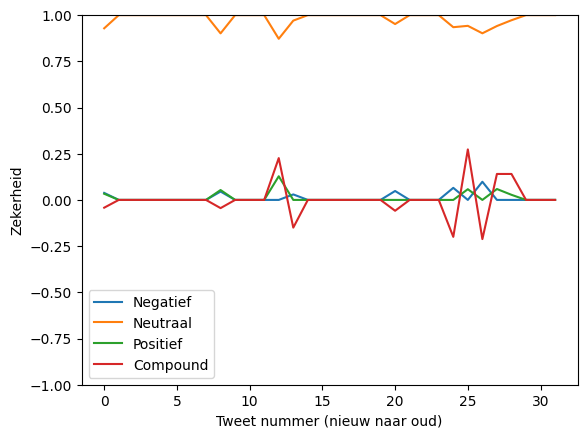

In [14]:
import tweepy
import deep_translator

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as pyplot

# Haal de tweets op.
## Maak de client met de bearer token.
client = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAG9EhAEAAAAAxbrTLy8TpwUmV6Gy9xgTXSBpgCs%3DIsWvGyUGw2XBK9rsR2tzkxMj7QtmIskIKoA0gWOc2N8sFgcsfj")

## Haal "max_results" tweets op van de gebruiker met een bepaald id en zet ze in een Paginator.
tweet_paginator = tweepy.Paginator(client.get_users_tweets, id="86038204", max_results=32)

## Zet alle tweets in de paginator in de lijst "tweet_list"
tweet_list = []
for tweet in tweet_paginator.flatten(limit=32):
    tweet_list.append(tweet.text)

# Vertaal de tweet lijst van nederlands naar engels
tweet_list_translated = deep_translator.GoogleTranslator(source="nl", target="en").translate_batch(tweet_list)

# Reken het sentiment uit van alle tweets in de tweet_list
## Maak lijsten met de scores op verschillende vlakken voor de tweets
neg_scores_tweets = []
neu_scores_tweets = []
pos_scores_tweets = []
cmp_scores_tweets = []

## Loop door de lijst met tweets heen.
for tweet in tweet_list:
    ## Maak lijsten met de verschillende scores op verschillende vlakken voor de zinnen in de tweets
    neg_sentences = []
    neu_sentences = []
    pos_sentences = []
    cmp_sentences = []

    ## Tokenize de tweet (splits de tweet op in zinnen)
    sentences = nltk.tokenize.sent_tokenize(tweet)

    ## Loop door de lijst met alle zinnen van de tweet
    for sentence in sentences:
        ## Bereken het sentiment van de zin
        ss = SentimentIntensityAnalyzer().polarity_scores(sentence)

        ## Voeg de score van de zin toe aan de lijst met de scores voor de zinnen in de tweet
        neg_sentences.append(ss["neg"])
        neu_sentences.append(ss["neu"])
        pos_sentences.append(ss["pos"])
        cmp_sentences.append(ss["compound"])

    ## Bereken het gemiddelde van de verschillende scores van de zinnen in een tweet en voeg deze toe aan de lijst van scores voor de tweets
    neg_scores_tweets.append(sum(neg_sentences) / len(neg_sentences))
    neu_scores_tweets.append(sum(neu_sentences) / len(neu_sentences))
    pos_scores_tweets.append(sum(pos_sentences) / len(pos_sentences))
    cmp_scores_tweets.append(sum(cmp_sentences) / len(cmp_sentences))

# Plot de grafiek
## Stel een limiet voor de y-as
pyplot.ylim((-1.0, 1.0))
## Stel een label in voor de x-as
pyplot.xlabel("Tweet nummer (nieuw naar oud)")
## Stel een label in voor de x-as
pyplot.ylabel("Zekerheid")

## Plot de scores van alle tweets met een label
pyplot.plot(neg_scores_tweets, label="Negatief")
pyplot.plot(neu_scores_tweets, label="Neutraal")
pyplot.plot(pos_scores_tweets, label="Positief")
pyplot.plot(cmp_scores_tweets, label="Compound")

## Teken de legenda
pyplot.legend()
## Laat de grafiek zien
pyplot.show()